In [37]:
using Turing, CSV, DataFrames, 
      HypothesisTests, Plots,
      Random, DynamicHMC

In [36]:
import Pkg; Pkg.add("DynamicHMC")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SimpleUnPack ───────── v1.1.0
   Installed NamedDims ──────────── v1.2.1
   Installed TupleTools ─────────── v1.3.0
   Installed GPUArrays ──────────── v8.4.1
   Installed DynamicHMC ─────────── v3.4.6
   Installed TensorCast ─────────── v0.4.4
   Installed LLVM ───────────────── v4.17.1
   Installed LazyStack ──────────── v0.0.8
   Installed LLVMExtra_jll ──────── v0.0.18+0
   Installed LogDensityProblems ─── v2.1.1
   Installed Strided ────────────── v1.2.3
   Installed CovarianceEstimation ─ v0.2.9
   Installed TransmuteDims ──────── v0.1.13
    Updating `~/.julia/environments/v1.7/Project.toml`
  [bbc10e6e] + DynamicHMC v3.4.6
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [587fd27a] + CovarianceEstimation v0.2.9
  [bbc10e6e] + DynamicHMC v3.4.6
  [0c68f7d7] + GPUArrays v8.4.1
  [929cbde3] + LLVM v4.17.1
  [1fad7336] + LazyStack v0.0.8
  [6fdf6af0] + LogDensityProble

In [4]:
# Read in data for onesample t-test
url = "https://raw.githubusercontent.com/HPCurtis/HPCPortfolio/main/Data/Mehr%20Song%20and%20Spelke%202016%20Experiment%201.csv"
df = CSV.read(download(url), DataFrame);

In [5]:
# The data for the specific experiment is in the first 32 rows of the dataframe
red_df = df[1:32, :];
# check if id are correct by looking at last 2 rows id's.
last(red_df, 2)

,id,study_code,exp1,exp2,exp3,exp4,exp5,dob,dot1
,Int64,String7,Int64,Int64,Int64,String1,String1,String15,String15
1,131,"""LUL""",1,0,0,,,17-Oct-12,06-Apr-13
2,132,"""LUL""",1,0,0,,,01-Dec-12,08-May-13


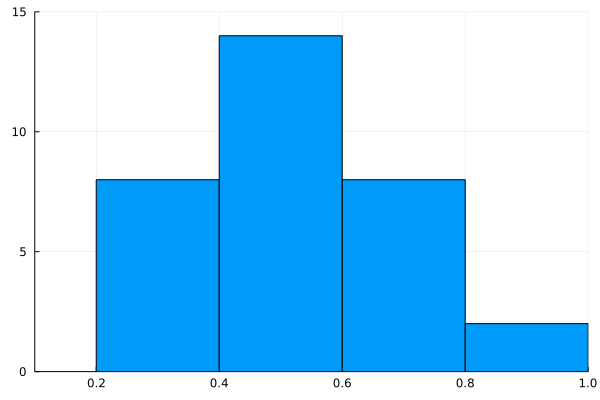

In [6]:
histogram(red_df[:,:Baseline_Proportion_Gaze_to_Singer],
          label = false, xlim = [0.1, 1], ylim = [0, 15])

In [32]:
@model function normal1(y)
    
    # Priors
    mu ~ Normal(0, 10)
    sigma ~ truncated(Normal(0, 10); lower=0)
    
    # likelihood
    return y ~ Normal(mu, sigma)
    
end


normal1 (generic function with 2 methods)

In [34]:
# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(normal1(red_df[:,:Baseline_Proportion_Gaze_to_Singer]),
    HMC(ϵ, τ), iterations)


Chains MCMC chain (1000×11×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.36 seconds
Compute duration  = 2.36 seconds
parameters        = mu, sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          mu    0.5176    0.0661     0.0021    0.0049   181.7329    1.0015     ⋯
       sigma    0.2002    0.2047     0.0065    0.0165   170.1326    1.0046     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          mu    0.4623    0.5001    0.5211    0.5443    0.5787
    

# References